# Exploratory Data Analysis

## Objectives

After completing this lab you will be able to:

  1. Explore features or characteristics to predict price of car
  2. Analyze patterns and run descriptive statistical analysis
  3. Group data based on identified parameters and create pivot tables
  4. Identify the effect of independent attributes on price of churn

In [3]:
# import Dataset and librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

To install data first install kagglehub 

In [5]:
!pip install kagglehub


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vipul\.cache\kagglehub\datasets\lorenzozoppelletto\financial-risk-for-loan-approval\versions\2


Now the dataset is downloaded we write the code that find the csv file in it and store it in into in dataframe

In [8]:
import os

# List the files in the directory to find the CSV file
file_list = os.listdir(path)
csv_file = None
for file in file_list:
    if file.endswith(".csv"):
        csv_file = file
        break

if csv_file:
    csv_path = os.path.join(path, csv_file)
    df = pd.read_csv(csv_path)
    print("CSV file found and loaded:", csv_path)
else:
    print("No CSV file found in the directory.")

CSV file found and loaded: C:\Users\vipul\.cache\kagglehub\datasets\lorenzozoppelletto\financial-risk-for-loan-approval\versions\2\Loan.csv



Now the csv file is found, now to display the all columns of dataset we use pandas display.max_columns function

In [10]:
pd.set_option('display.max_columns', None)
df.head(5)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


### Analyzing Missing values,Data Type and Prepairing Dataset

List the datatypes of each column

In [13]:
df.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

##### Check for missing values in it

In [15]:
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

Hence, there are no missing value in the dataset.

We can also use "info()" method to see datatype and null values at same time.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [19]:
# since application date does not contain any value in risk management so we drop it.
df= df.drop(['ApplicationDate'], axis=1)

### Analyzing Individual Feature Patterns Using Visulization

##### How to choose the right visualization method?

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

First Find the relevent columns using correlation matrix, if value is near to 1 shows that these two feature varible are dependent on each other

<div style="background-color:#ffecec; padding: 15px; border-radius: 5px;">
  <h4>Task #1:</h4>
  <b>Calculate the correlation matrix for the given dataset.<span style="color:red;"></span></b>
</div>


we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [26]:
df_numeric = df.select_dtypes(include=[float,int])
df_numeric.corr()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
Age,1.000000,0.144774,0.323243,0.982980,-0.007492,-0.006992,-0.000287,0.015685,-0.001394,-0.001069,-0.002165,0.004438,0.010817,-0.003684,-0.002487,-0.000139,0.004236,0.010145,0.012210,-0.001197,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,0.141029,-0.164304
AnnualIncome,0.144774,1.000000,0.104045,0.145999,-0.004116,0.002972,-0.001244,-0.001082,-0.007935,-0.008175,-0.005016,0.001507,0.003816,0.004302,0.003715,-0.005365,-0.001397,0.008613,-0.005158,-0.002353,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,0.597900,-0.483289
CreditScore,0.323243,0.104045,1.000000,0.327664,-0.010834,-0.000762,-0.014453,0.011153,-0.009650,-0.008780,-0.001928,0.001913,0.008638,-0.007690,0.004295,0.005217,-0.006316,0.005515,0.001342,-0.006722,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,0.142000,-0.240198
Experience,0.982980,0.145999,0.327664,1.000000,-0.007921,-0.007924,0.000136,0.018629,-0.001751,-0.002143,-0.002905,0.003139,0.009600,-0.002459,-0.003346,-0.001132,0.005876,0.009292,0.013074,-0.000449,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,0.140755,-0.166496
LoanAmount,-0.007492,-0.004116,-0.010834,-0.007921,1.000000,-0.000436,-0.007005,0.021103,0.000806,0.000769,-0.006239,-0.009577,0.004844,-0.002352,-0.002811,0.000580,0.001489,0.005408,-0.004238,0.000502,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,-0.239496,0.137981
LoanDuration,-0.006992,0.002972,-0.000762,-0.007924,-0.000436,1.000000,-0.001301,0.000068,-0.006160,0.001489,0.000978,0.001913,-0.000434,0.015646,0.001983,0.013693,0.001579,-0.002832,-0.008297,0.003668,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,-0.094558,0.054550
NumberOfDependents,-0.000287,-0.001244,-0.014453,0.000136,-0.007005,-0.001301,1.000000,-0.002396,0.011544,0.006033,-0.003749,-0.007981,-0.001154,0.006116,0.001281,0.002705,-0.002080,0.002485,-0.006284,0.009942,-0.000414,0.008735,0.010910,-0.008423,0.006977,0.006749,-0.001390,-0.000358,0.001717,0.001686
MonthlyDebtPayments,0.015685,-0.001082,0.011153,0.018629,0.021103,0.000068,-0.002396,1.000000,0.005420,0.006280,0.009889,0.001205,-0.007493,0.002713,-0.003347,-0.004115,-0.004223,0.001909,0.003070,-0.004211,-0.000356,0.001638,0.005863,0.004430,0.000010,0.003895,0.018021,0.219453,-0.070415,0.036938
CreditCardUtilizationRate,-0.001394,-0.007935,-0.009650,-0.001751,0.000806,-0.006160,0.011544,0.005420,1.000000,0.001491,0.001708,0.002231,0.010892,-0.004450,0.004517,0.007446,0.004026,-0.002115,-0.005047,-0.007778,-0.009381,0.013040,-0.006979,-0.003506,0.003668,0.001030,0.004366,0.010490,-0.010466,0.108758
NumberOfOpenCreditLines,-0.001069,-0.008175,-0.008780,-0.002143,0.000769,0.001489,0.006033,0.006280,0.001491,1.000000,0.000446,0.004363,-0.001612,0.012600,0.002388,0.003653,0.009167,-0.005282,-0.003896,-0.008406,-0.008050,-0.010497,0.007298,-0.002013,0.007457,0.008090,-0.005058,0.003471,-0.004769,0.007762


### Continuous Numerical Variables

Continuous numerical variables are variables that may contain any value within some range. They can be of type `int64` or `float64`. A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the target (e.g., loan approval probability or price), we can use **Seaborn's `regplot`**, which plots the scatterplot plus the fitted regression line.

This will be useful later for visualizing the fit of simple linear regression models.

---

Let's see several examples of different linear relationships:


#### Positive Linear Relationship

let's find the scatterplot of "RiskScore" and "BankruptcyHistory"

(0.0, 88.70527655184841)

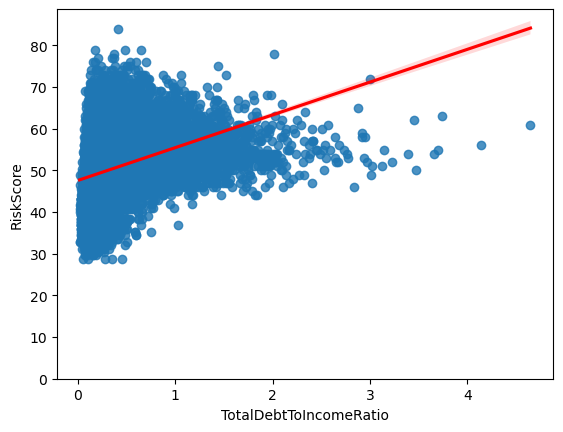

In [30]:
sns.regplot(y = df["RiskScore"], x = df['TotalDebtToIncomeRatio'], line_kws= {"color" : "red"})
plt.ylim(0,)

#### Explanation:

Total Debt-to-Income Ratio (DTI) measures how much of a person’s income goes toward paying debts.

A high DTI means the person is already burdened with debt → less capacity to handle new loans → higher credit risk.

#### Key Observation

1. A minimum risk of 27% - 30% always present.
2. Total Debt to Income Ratio is potential good predictor of Risk Score in finance sector.
3. As the client Debt to income ratio increse beyond 1 indicating the significant higher risk of 55-80%.
4. If debt to income ratio is more than 1 means clint's debts are more than clint income, can create potential financial risk.
5. As debt to income ratio increase more than 1 leads to bankruptcy and dip in credit score or cibil score than increase the risk score if it sustained over time.

---

Let's analysis these both factors


(0.0, 86.76)

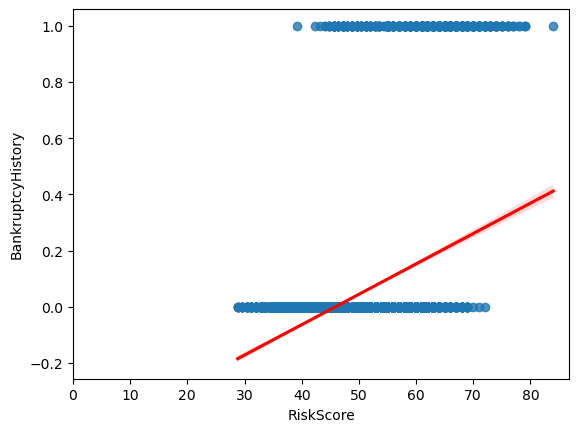

In [33]:
sns.regplot(y = df['BankruptcyHistory'], x= df['RiskScore'], line_kws={"color":"red"})
plt.xlim(0,)

#### Explanation

Bankruptcy is a categorical varible have 0 and 1 values for no bankrupcy and has bankruptcy respectively.

Bankruptcy means a person or company legally declares they are unable to pay their debts.

#### Key Obervation

1. As minimum risk of 27-30% is present.
2. Bankruptcy is significant factor that can not be ignore for predicting risk score in finance.
3. when client was declare bankrupt increase the potential risk score this indicates that in past clint has more debt than income.
---

### Negative Linear Relationship

Let's analyze the CreditScore factor-

(0.0, 86.76)

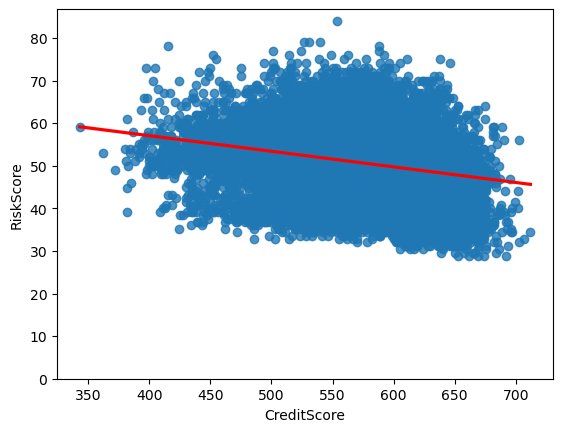

In [36]:
sns.regplot(x=df['CreditScore'], y=df['RiskScore'], line_kws={"color":"red"})
plt.ylim(0,)

#### Explanation

Credit score is a numerical summary of your past borrowing behavior used by banks and lenders to decide whether to lend you money, and at what interest rate.

Means in how much managed way you repayment of your loan.

#### Key Observation

1. Minimum risk of 27-30% present.
2. As debt to income ratio increases, leads to delay in repayment of loan amount that significantlly affect the credit score / CIBIL score.
3. CreditScore and RiskScore has negative linear relationship, means when credit score increase it significanlly reduces the riskscore factor.
4. For less financial risk for loan client must mantain their credit score.

### Weak Linear Relationship

Let's analyze the Savings Account Balance factor

(0.0, 86.76)

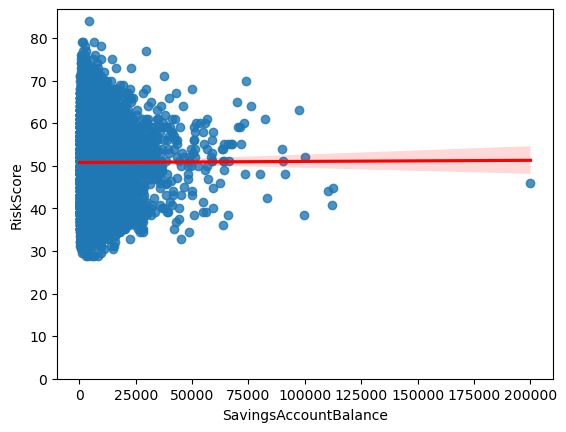

In [40]:
sns.regplot(x = df['SavingsAccountBalance'], y = df['RiskScore'], line_kws={"color":"red"})
plt.ylim(0,)

#### Explanation
1. Saving account money is on x axis.
2. Riskscore has lower impact of saving account balance.


#### Key Observations

1. Minimum risk of 27-30% present.
2. Saving account is poor predictor of risk score for financial.

### Categorical Variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

If dataset contains any categorical varibles then run the below code

<Axes: xlabel='EducationLevel', ylabel='RiskScore'>

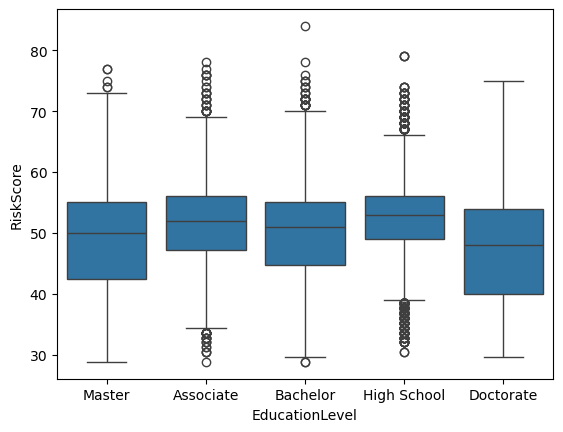

In [68]:
sns.boxplot(x="EducationLevel", y="RiskScore", data=df)

#### Explanation:

The box plot displays the distribution of RiskScore across different categories of EducationLevel: Master, Associate, Bachelor, High School, and Doctorate.

Each box shows:

1. Median (middle line inside the box)
2. Interquartile range (IQR) – from 25th percentile (Q1) to 75th percentile (Q3)
3. Whiskers – extend to 1.5 * IQR from the quartiles
4. Outliers – points outside the whiskers (plotted as circles)

#### Key Observations:

1. Median RiskScore:
    - Fairly similar across all education levels, generally around 50–53.
    - Individuals with High School and Associate education show slightly higher median RiskScores than others.
    - Doctorate holders show a slightly lower median.


2. Spread of Scores (IQR):
    - All groups show similar IQRs, but Doctorate and Master holders have more variation (wider boxes).
    - Associate and High School groups have tighter IQRs, indicating more concentrated scores.


3. Outliers:
    - Significant number of outliers in all categories, especially High School and Bachelor.
    - These may represent individuals with unusually high or low risk scores compared to their peers.


4. Risk Trend by Education:
    - There's no clear trend showing that higher education consistently leads to lower or higher risk.
    - However, Doctorate holders tend to have more variability in scores and slightly lower central tendency.

### Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

The "describe" function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

  - the count of that variable
  - the mean
  - the standard deviation (std)
  - the minimum value
  - the IQR (Interquartile Range: 25%, 50% and 75%)
  - the maximum value

We can apply the method "describe" as follows:

In [78]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,0.993000,0.285735,0.052400,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,0.986965,0.160211,0.222838,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,0.000000,0.001720,0.000000,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,0.000000,0.161035,0.000000,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,1.000000,0.264454,0.000000,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,2.000000,0.390327,0.000000,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,7.000000,0.902253,1.000000,1.000000,45.000000,29.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [81]:
df.describe(include=['object'])

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000
unique,3,5,4,4,5
top,Employed,Bachelor,Married,Mortgage,Home
freq,17036,6054,10041,7939,5925


#### Value Counts

Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "EmploymentStatus ". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['EmploymentStatus '], not two brackets df[['EmploymentStatus ']].

In [86]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

We can convert the series to a dataframe as follows:

In [89]:
df['EmploymentStatus'].value_counts().to_frame()

,count
EmploymentStatus,
Employed,17036
Self-Employed,1573
Unemployed,1391
